Le di alguna vuelta más porque me extrañaba que no funcionara.
Lo que nos faltó es incrementar el set de datos. Como hay un input más que antes y la operación es más "complicada" (el rango en y crece muchísimo) necesitabamos darle un training set mayor, con más datos. Si simulo 10000 datos en vez de 1000, y lo pongo de 0 a 10 en vez de de 0 a 100, da cosas razonables (no da perfecto pero da mejor). Si lo queremos dejar de 0 a 100, habría que darle muchos más datos. El tamaño del set de datos es importante. Cuando entrenamos una red habría que ver cual es el tamaño necesario (ese en que si lo incremento ya no mejoro los resultados). Ha sido un placer dar estas clases :) . 

In [16]:
# vamos a entrenar una red para que sume 3 valores
import numpy as np
import matplotlib.pyplot as pl
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

In [29]:
#Generamos training set con 1000 datos. 
# Input: vector de 3 números aleatorios X1, X2 y X3 (inputs) y los sumamos (Y, output) 
X1=np.random.uniform(size=10000)*10
X2=np.random.uniform(size=10000)*10
X3=np.random.uniform(size=10000)*10
X4=np.random.uniform(size=10000)*10
X=np.transpose([X1,X2,X3,X4])
# soluciones
Y=X1*X2*X3 
print np.shape(X),np.shape(Y)

(10000, 4) (10000,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y) 
np.shape(y_train),np.shape(y_test)



((7500,), (2500,))

In [39]:
# definimos numero de capas y de hidden nodes (3 capas, de 2 ,5  y 10 neuronas) 
# Exagerado para este problema ..
mlp = MLPRegressor(hidden_layer_sizes=(15,10,10),activation='relu',solver='adam',max_iter=1000,verbose=True) # batch_size default depending on minimizer

In [40]:
mlp.fit(X_train,y_train) # usa modelo red neuronal que hemos definido antes y(x,w)
# mlp.loss_curve en Clasificación te guarda el valor de la función coste a cada iteración

Iteration 1, loss = 18910.61339157
Iteration 2, loss = 18475.02407219
Iteration 3, loss = 17540.16167901
Iteration 4, loss = 15624.67096908
Iteration 5, loss = 12035.92241147
Iteration 6, loss = 8466.84600841
Iteration 7, loss = 7136.08268180
Iteration 8, loss = 6752.14427470
Iteration 9, loss = 6375.30508627
Iteration 10, loss = 5920.51548465
Iteration 11, loss = 5379.36333649
Iteration 12, loss = 4942.47321253
Iteration 13, loss = 4631.72639924
Iteration 14, loss = 4323.49910130
Iteration 15, loss = 3997.69370548
Iteration 16, loss = 3648.59417704
Iteration 17, loss = 3289.22935110
Iteration 18, loss = 2917.36004501
Iteration 19, loss = 2550.84041822
Iteration 20, loss = 2190.98090961
Iteration 21, loss = 1879.70524369
Iteration 22, loss = 1579.27134660
Iteration 23, loss = 1332.00455675
Iteration 24, loss = 1149.33914917
Iteration 25, loss = 1000.27016354
Iteration 26, loss = 891.65589382
Iteration 27, loss = 817.78338484
Iteration 28, loss = 759.09534595
Iteration 29, loss = 718.56

Iteration 251, loss = 25.68000188
Iteration 252, loss = 25.57875334
Iteration 253, loss = 25.20955599
Iteration 254, loss = 25.85124572
Iteration 255, loss = 25.46882527
Iteration 256, loss = 25.61595130
Iteration 257, loss = 25.35227696
Iteration 258, loss = 24.47305159
Iteration 259, loss = 24.45337233
Iteration 260, loss = 24.25704945
Iteration 261, loss = 24.64542932
Iteration 262, loss = 24.23788401
Iteration 263, loss = 25.07161940
Iteration 264, loss = 23.96390535
Iteration 265, loss = 24.11280474
Iteration 266, loss = 24.47119072
Iteration 267, loss = 23.85478127
Iteration 268, loss = 24.37122905
Iteration 269, loss = 24.07779689
Iteration 270, loss = 23.37215350
Iteration 271, loss = 23.81226771
Iteration 272, loss = 23.23245138
Iteration 273, loss = 23.20297585
Iteration 274, loss = 23.79003546
Iteration 275, loss = 24.01580479
Iteration 276, loss = 22.66468148
Iteration 277, loss = 23.43807558
Iteration 278, loss = 23.15187048
Iteration 279, loss = 22.36071176
Iteration 280,

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15, 10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [41]:
# en python2.7 no funciona para regresión, en python 3 si. Así podemos ver como avanza
#pl.plot(mlp.loss_curve_)  # mlp.loss_curve nos da una idea de como converge el training set
#pl.xlabel('iteration')
#pl.ylabel('loss function')

coeficiente correlación 0.9992804686733101
error relativo 92.56710590724903


Text(0,0.5,'y true')

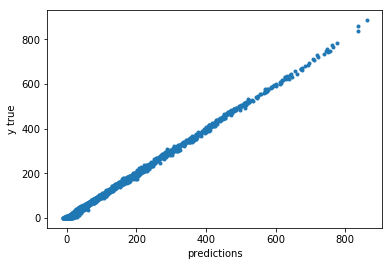

In [42]:
predictions = mlp.predict(X_test) # estimamos resultado con el TEST
#predictions=predictions*s+m
print 'coeficiente correlación', np.corrcoef(predictions,y_test)[0][1]  # calculamos correlación con el valor esperado
print 'error relativo', np.mean(abs(predictions-y_test)/y_test)*100  # calculamos correlación con el valor esperado


pl.plot(predictions,y_test,'.')
pl.xlabel('predictions')
pl.ylabel('y true')


In [43]:
# Le pregunto a la red que me sume 10+30+5 

In [44]:
A=np.array([10,5,6,1]).reshape(1,-1) # sklearn necesita que se lo de dimension(1,n)
print 'la multiplicacion predicha es', np.round(mlp.predict(A)) # redondamos

print 'la multiplicacion real es',np.round(10*5*6*1)

la multiplicacion predicha es [300.]
la multiplicacion real es 300


In [45]:
# si miramos valores muy lejos del rango
A=np.array([10,10,10,1]).reshape(1,-1) 
np.shape(A)
print 'la multiplicacion predicha es', np.round(mlp.predict(A)) # redondamos
print 'la multiplicacion real es',10*10*10*1

la multiplicacion predicha es [950.]
la multiplicacion real es 1000


In [46]:
print 'No es perfecto pero ha mejorado'



No es perfecto per ha mejorado
